# PRIMER ENTREGA

**Se entrega el viernes 22**

Holaaaaaaaaaaaaa

#### Entorno de trabajo

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


%matplotlib inline

#### lectura de datos

In [2]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv")

# a. Diseño de solución propuesto

En primer instancia planteamos el uso de un modelo de regresión logística, puesto que dicho modelo es adecuado para problemas de clasificación binaria, como es el caso de este, donde se trata de predecir si un empleado abandonará su empleo o no.

Sin embargo también planteamos la alternativa de usar Árboles de decisión, ya que son un modelo de aprendizaje supervisado que puede ser utilizado para problemas de clasificación y regresión, con la desventaja que pueden ser menos precisos que los modelos de regresión logística.

# b. Limpieza y transformación de los datos

#### Información de cada tabla

In [3]:
df_employee_survey.info()
df_employee_survey.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


In [4]:
df_general.info()
df_general.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


In [5]:
df_manager_survey.info()
df_manager_survey.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


In [6]:
df_time_work.info()
df_time_work.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1;6 to 4410;6
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EmployeeID;mean_time  4410 non-null   int64
dtypes: int64(1)
memory usage: 68.9+ KB


,EmployeeID;mean_time
1;6,8702
2;7,316
3;6,8161


Corrección en lectura de la tabla 'time_work' Que esta separada por punto y coma

#### Lectura de tabla separada por ;

In [7]:
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")
df_time_work.info()
display(df_time_work.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  4410 non-null   int64 
 1   mean_time   4410 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.0+ KB


,EmployeeID,mean_time
0,1,"6,8702"
1,2,"7,316"
2,3,"6,8161"
3,4,"6,7892"
4,5,"7,8776"


#### Union de las tablas

In [8]:
df = df_employee_survey.merge(df_general, on="EmployeeID")
df = df.merge(df_manager_survey, on="EmployeeID")
df = df.merge(df_time_work, on="EmployeeID")

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,"6,8702"
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,"7,316"
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,"6,8161"


#### Columnas con un solo valor

##### Consulta

In [9]:
# Obtener la cantidad de valores únicos en cada columna
nunique_values = df.nunique()

# Seleccionar las columnas con un solo valor
single_value_columns = nunique_values[nunique_values == 1].index

print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [10]:
df[['EmployeeCount', 'Over18', 'StandardHours']]

,EmployeeCount,Over18,StandardHours
0,1,Y,8
1,1,Y,8
2,1,Y,8
3,1,Y,8
4,1,Y,8
...,...,...,...
4405,1,Y,8
4406,1,Y,8
4407,1,Y,8
4408,1,Y,8


##### Eliminación de columnas con un solo valor

In [11]:
df_1 = df.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)

nunique_values = df_1.nunique()
single_value_columns = nunique_values[nunique_values == 1].index
print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index([], dtype='object')


#### Tratamiento para nulos

##### Media

In [13]:
df_median = df_1

median_TotalWorkingYears = df_median['TotalWorkingYears'].median()
median_JobSatisfaction = df_median['JobSatisfaction'].median()
median_NumCompaniesWorked = df_median['NumCompaniesWorked'].median()
median_WorkLifeBalance =df_median['WorkLifeBalance'].median()
median_EnvironmentSatisfaction =df_median['EnvironmentSatisfaction'].median()

df_median['TotalWorkingYears'].fillna(median_TotalWorkingYears, inplace=True)
df_median['JobSatisfaction'].fillna(median_JobSatisfaction, inplace=True)
df_median['NumCompaniesWorked'].fillna(median_NumCompaniesWorked, inplace=True)
df_median['WorkLifeBalance'].fillna(median_WorkLifeBalance, inplace=True)
df_median['EnvironmentSatisfaction'].fillna(median_EnvironmentSatisfaction, inplace=True)

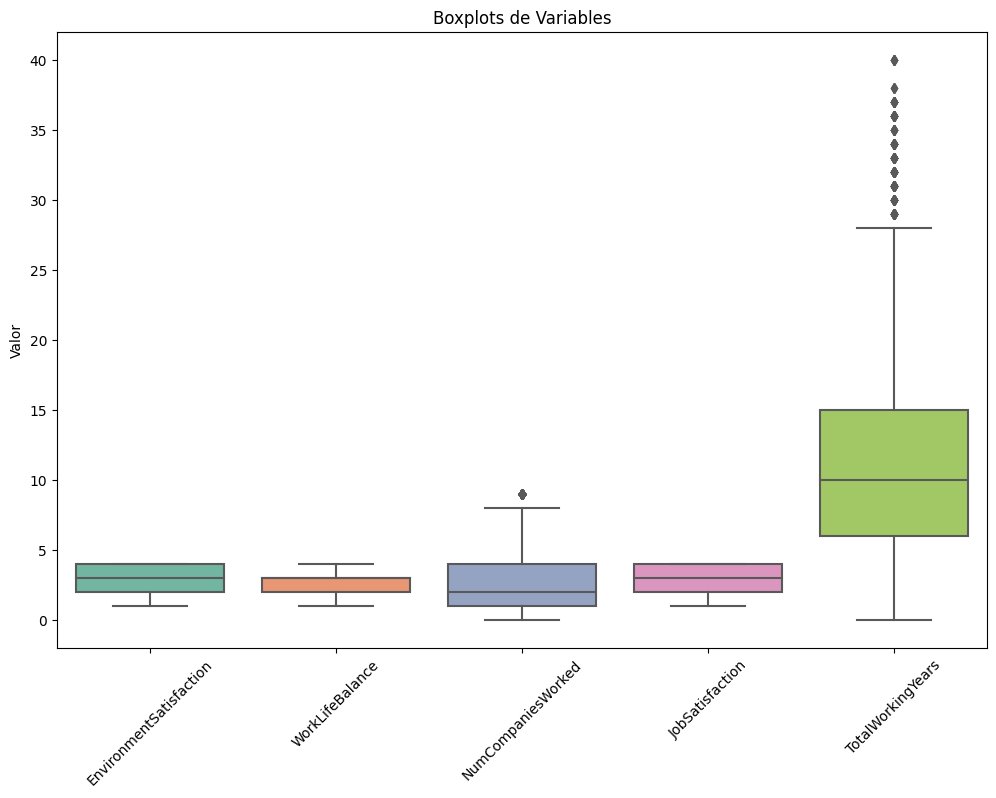

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas a visualizar
columns_to_plot = ['EnvironmentSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked', 'JobSatisfaction', 'TotalWorkingYears']

# DataFrame con las columnas seleccionadas
subset_df = df_1[columns_to_plot]

# boxplot con Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset_df, orient='vertical', palette='Set2')
plt.title('Boxplots de Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

In [26]:

null_count = df_median.isnull()
null_count_sum = null_count.sum(axis=0)
null_count_sum

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
dtype: int64

In [27]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  Gender                   4410 non-null   object 
 12  JobLevel                 4410 non-null   int64  
 13  JobRole                  4410 non-null   object 
 14  MaritalStatus           

In [18]:
#df_median['JobSatisfaction']
#df_median['JobSatisfaction'].median()
#df_median['JobSatisfaction'].isnull()
df_median[df_median['JobSatisfaction'].isnull()]

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time


##### Mean

In [38]:
df_mean=df_1

mean_environment_satisfaction = df_mean['EnvironmentSatisfaction'].mean()
mean_JobSatisfaction = df_mean['JobSatisfaction'].mean()
mean_WorkLifeBalance = df_mean['WorkLifeBalance'].mean()
mean_NumCompaniesWorked = df_mean['NumCompaniesWorked'].mean()


df_mean['EnvironmentSatisfaction'].fillna(mean_environment_satisfaction, inplace=True)
df_mean['JobSatisfaction'].fillna(mean_JobSatisfaction, inplace=True)
df_mean['WorkLifeBalance'].fillna(mean_WorkLifeBalance, inplace=True)
df_mean['NumCompaniesWorked'].fillna(mean_NumCompaniesWorked, inplace=True)

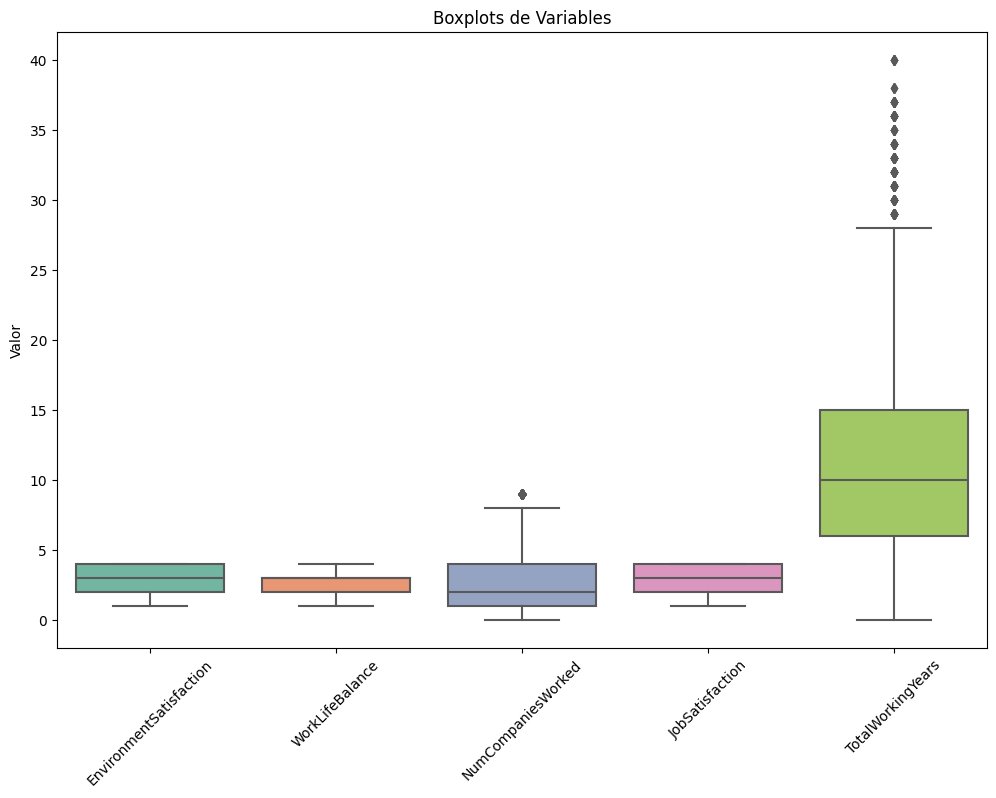

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas a visualizar
columns_to_plot = ['EnvironmentSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked', 'JobSatisfaction', 'TotalWorkingYears']

# DataFrame con las columnas seleccionadas
subset_df = df_1[columns_to_plot]

# boxplot con Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=subset_df, orient='vertical', palette='Set2')
plt.title('Boxplots de Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

In [25]:
null_count = df_mean.isnull()
null_count_sum = null_count.sum(axis=0)
null_count_sum

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
dtype: int64

#### Correlación entre variables numericas del datframe

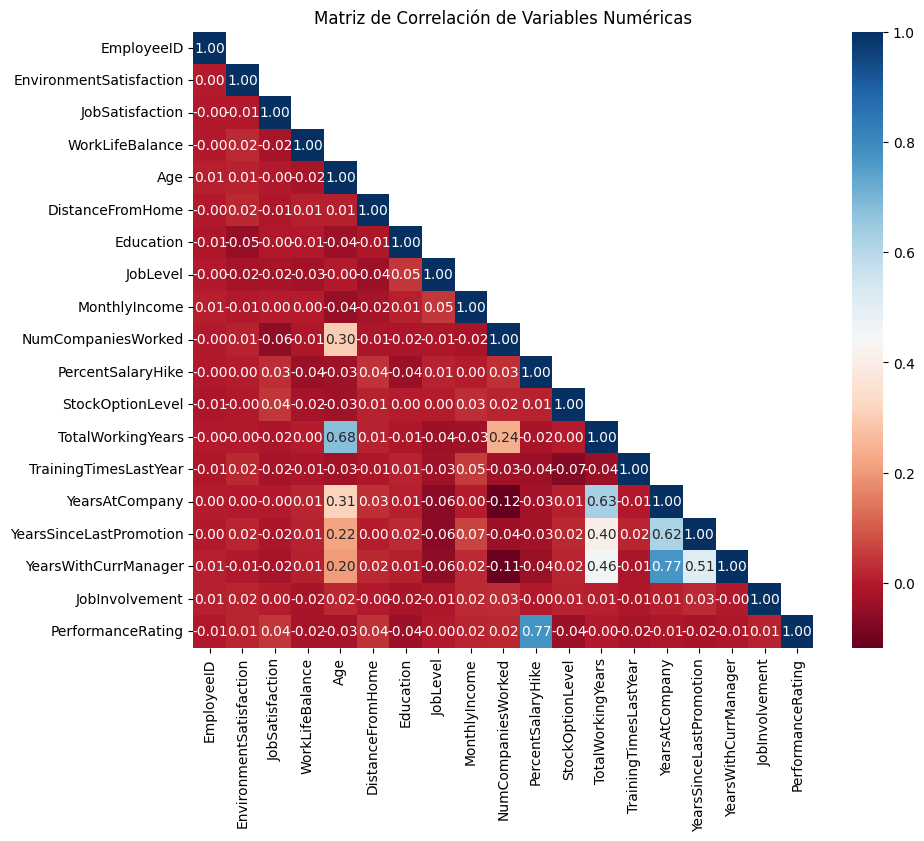

In [44]:

# variables numéricas
df_numericas = df_1.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numericas.corr()

# Crear una máscara triangular superior
mask = np.triu(correlation_matrix, k=1)

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Usar la paleta de colores RdBu
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", mask=mask)

# Añadir un título más descriptivo
plt.title("Matriz de Correlación de Variables Numéricas")

# Mostrar el gráfico
plt.show()

# c. Análisis exploratorio de los datos

Resumen estadistico

In [45]:
df_1.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.725170,2.729478,2.763492,36.923810,9.192517,2.912925,2.063946,65029.312925,2.691837,15.209524,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741
std,1273.201673,1.089852,1.098904,0.703541,9.133301,8.105026,1.023933,1.106689,47068.888559,2.493912,3.659108,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000


Resumen de valores nulos

In [46]:
df_1.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
dtype: int64

Distribuciones de variables numéricas

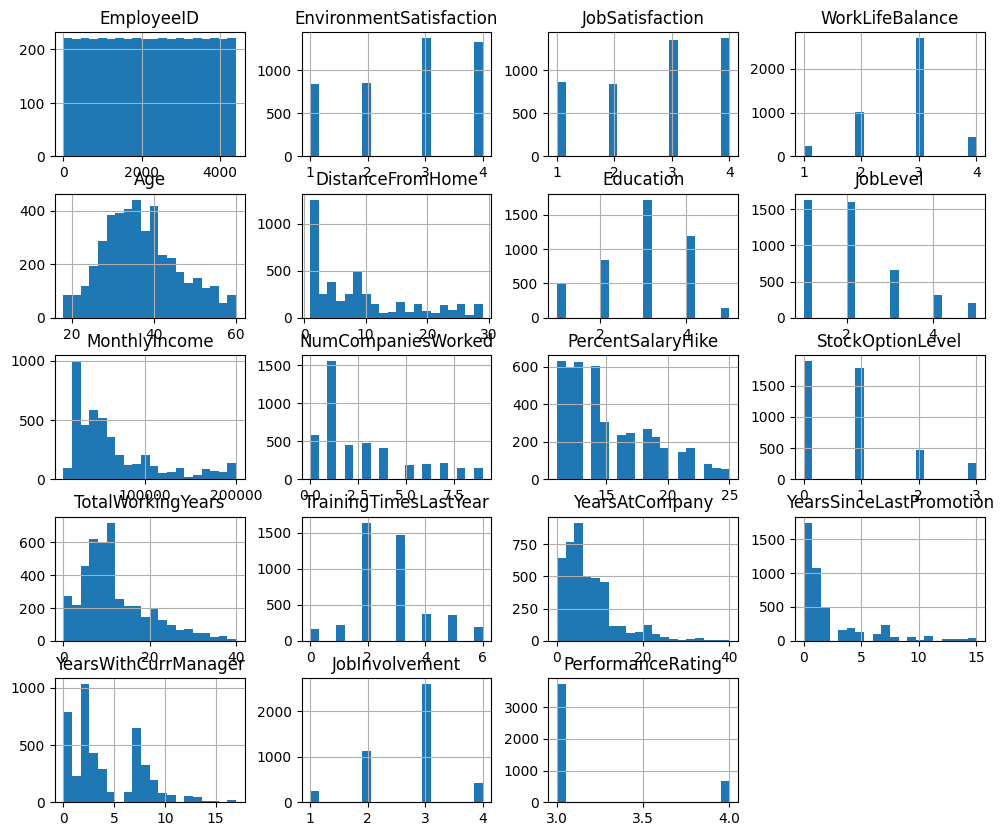

In [47]:
df_1.hist(figsize=(12, 10), bins=20)
plt.show()

Distribuciones de variables categóricas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

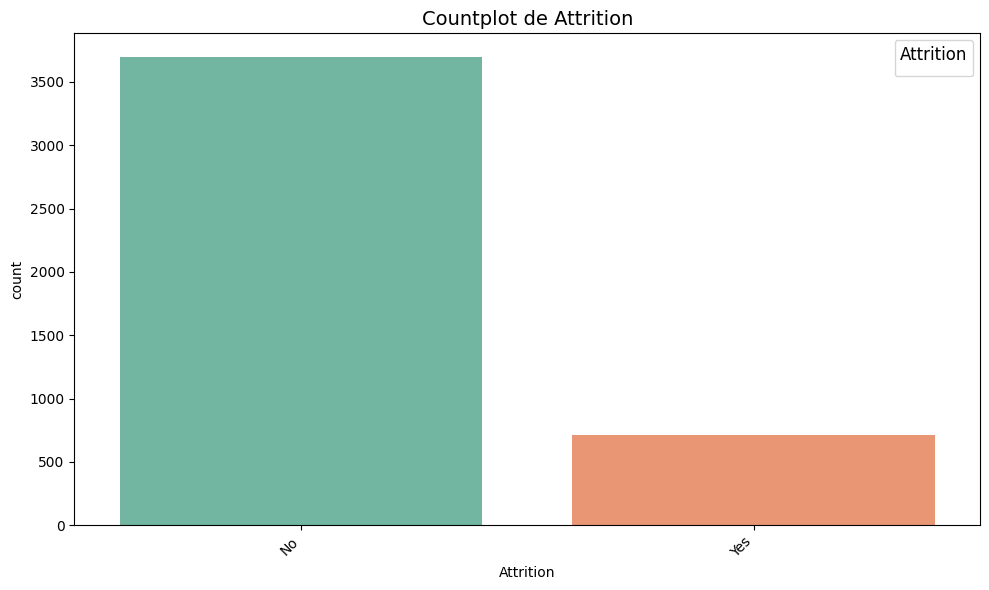

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


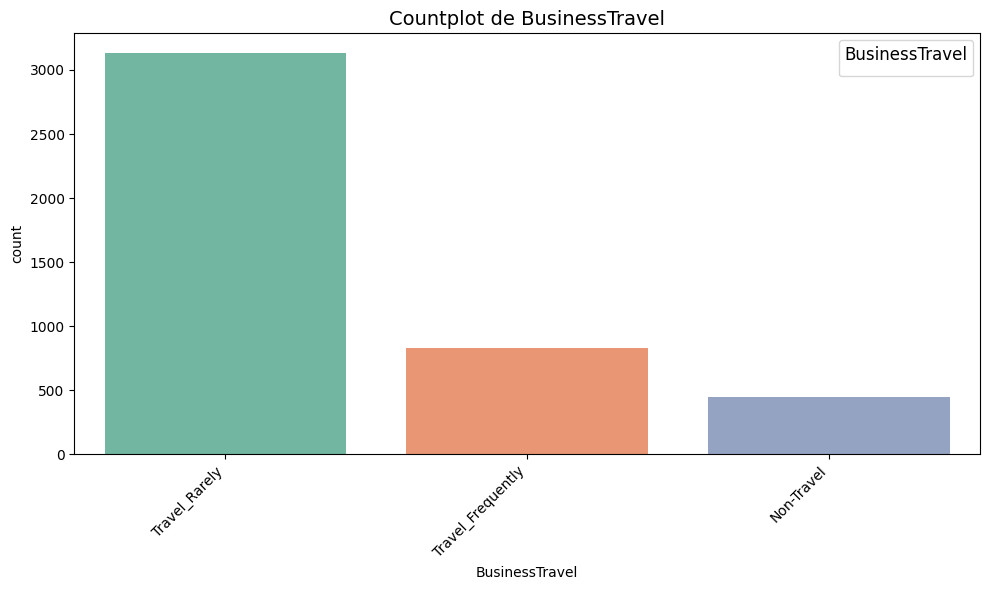

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


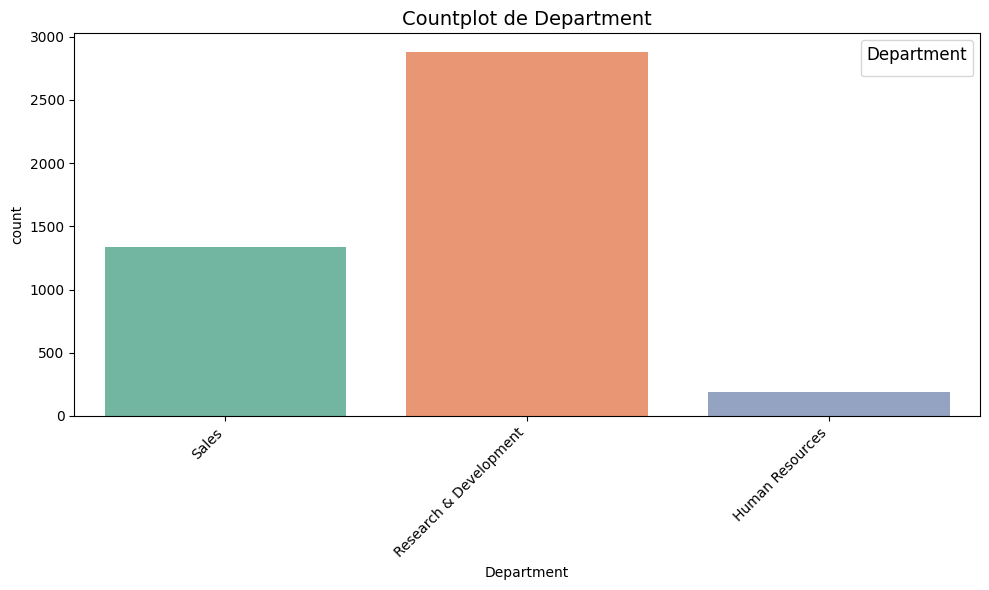

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


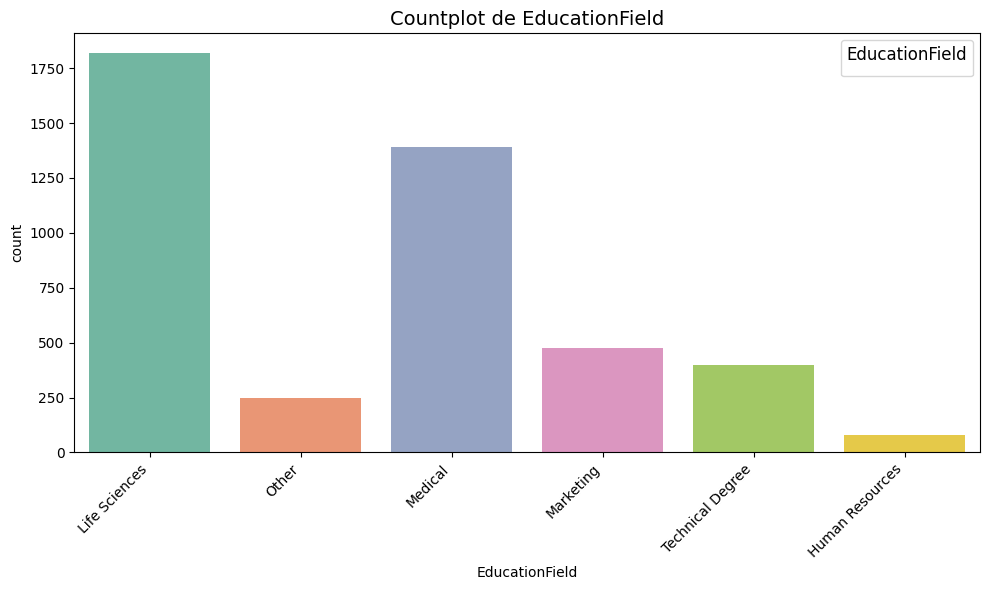

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


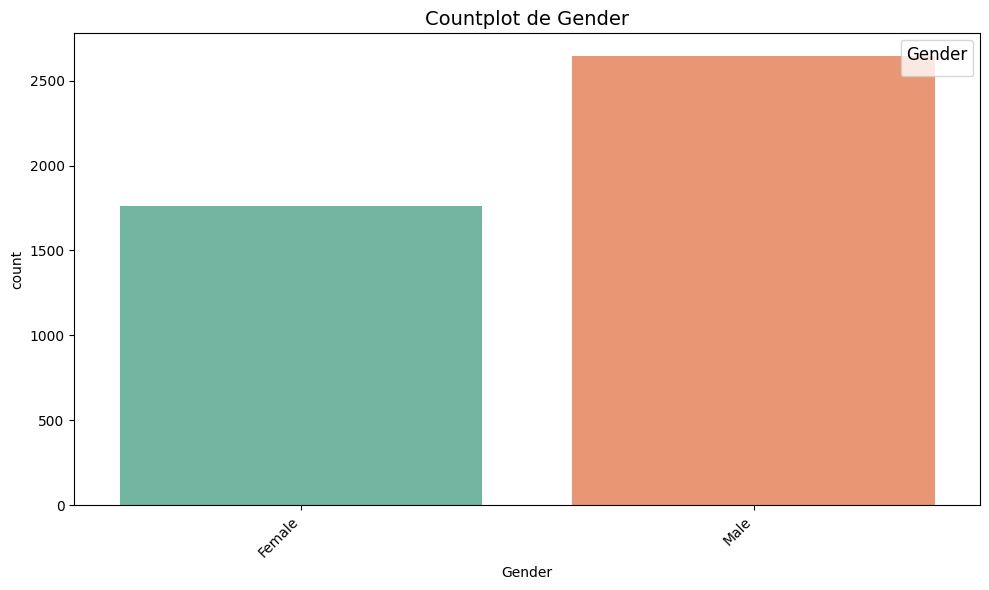

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


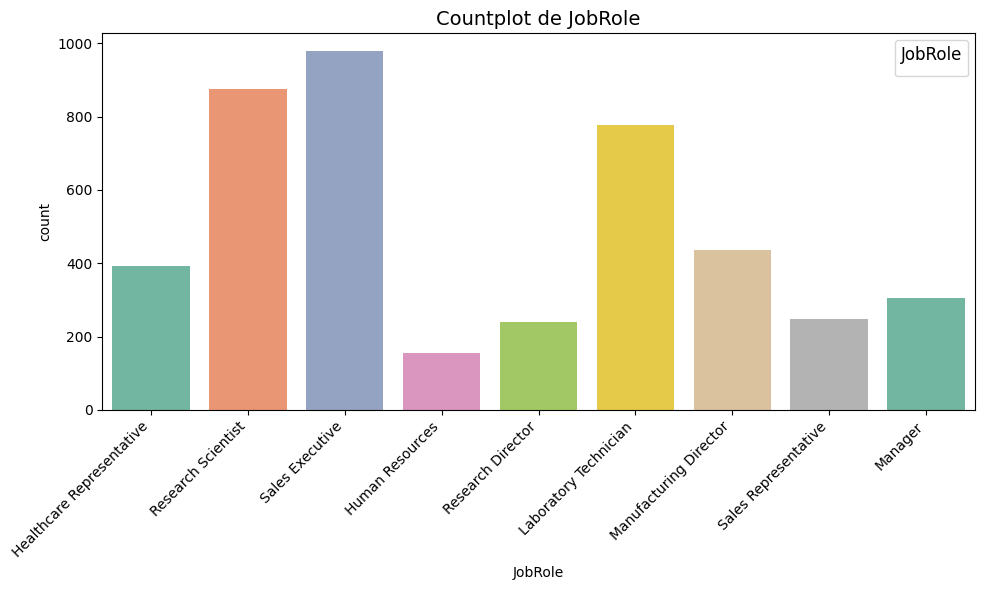

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


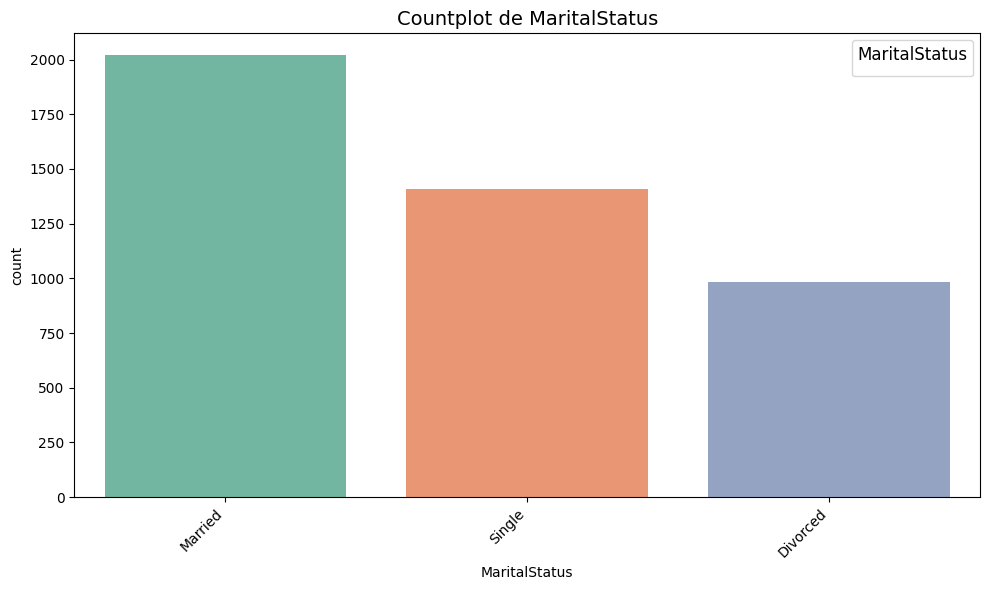

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


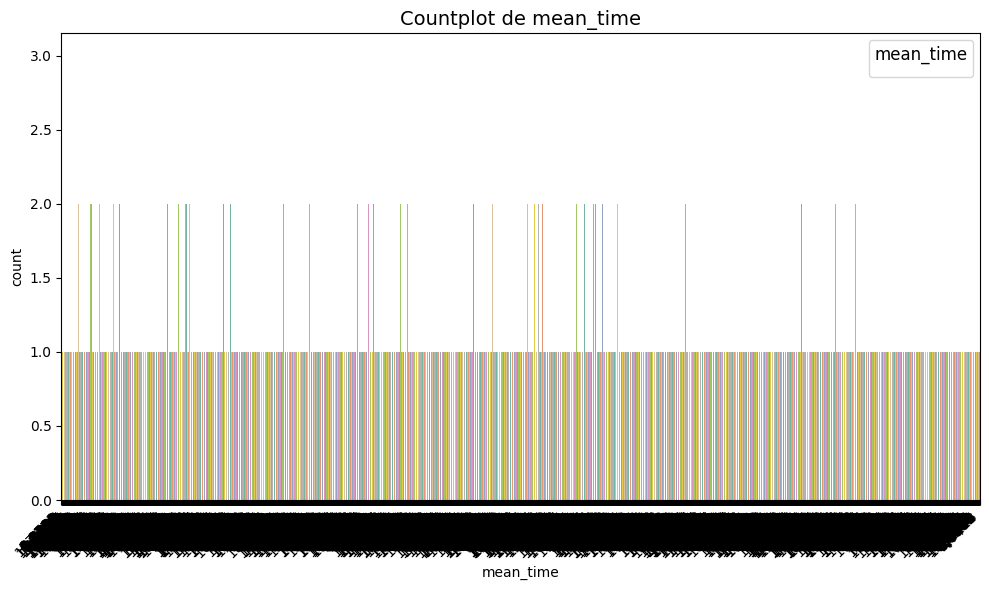

In [53]:

# Seleccionar las columnas categóricas
categorical_columns = df_1.select_dtypes(include=['object']).columns

# Definir el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iterar a través de las columnas categóricas y crear los countplots
for col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico individual
    ax = sns.countplot(x=col, data=df_1, palette="Set2")  # Usar la paleta de colores Set2

    # Ajustar el tamaño de la leyenda y las etiquetas del eje x
    plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas en el eje x
    ax.legend(title=col, title_fontsize=12, loc='upper right')  # Definir el título de la leyenda

    # Añadir un título descriptivo
    plt.title(f"Countplot de {col}", fontsize=14)

    # Mostrar el gráfico
    plt.tight_layout()  # Evitar que se recorten las etiquetas
    plt.show()


Relaciones entre variables numéricas

In [51]:
import pandas as pd
from scipy.stats import chi2_contingency

# Seleccionar solo las columnas categóricas
df_categoricas = df_1.select_dtypes(include=['object'])

# Crear una matriz vacía para almacenar los valores de p-valor
p_values = []

# Calcular la matriz de correlación de chi-cuadrado
for col1 in df_categoricas.columns:
    row_p_values = []
    for col2 in df_categoricas.columns:
        if col1 == col2:
            row_p_values.append(1.0)  # Poner 1.0 en la diagonal principal
        else:
            contingency_table = pd.crosstab(df_categoricas[col1], df_categoricas[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            row_p_values.append(p)
    p_values.append(row_p_values)

# Crear un DataFrame de p-valores
p_value_df = pd.DataFrame(p_values, columns=df_categoricas.columns, index=df_categoricas.columns)

print("Matriz de p-valores:")
print(p_value_df)


Matriz de p-valores:
                   Attrition  BusinessTravel    Department  EducationField  \
Attrition       1.000000e+00    1.764277e-16  4.820888e-07    8.288917e-09   
BusinessTravel  1.764277e-16    1.000000e+00  1.059287e-05    3.644960e-08   
Department      4.820888e-07    1.059287e-05  1.000000e+00    0.000000e+00   
EducationField  8.288917e-09    3.644960e-08  0.000000e+00    1.000000e+00   
Gender          2.452948e-01    1.896910e-02  7.350169e-01    1.478702e-01   
JobRole         1.485545e-03    4.132882e-02  2.713824e-02    2.087351e-03   
MaritalStatus   8.453859e-31    1.588865e-04  9.920271e-05    1.384499e-04   
mean_time       1.718762e-01    5.101004e-01  6.567202e-01    7.752965e-01   

                  Gender   JobRole  MaritalStatus  mean_time  
Attrition       0.245295  0.001486   8.453859e-31   0.171876  
BusinessTravel  0.018969  0.041329   1.588865e-04   0.510100  
Department      0.735017  0.027138   9.920271e-05   0.656720  
EducationField  0.147870

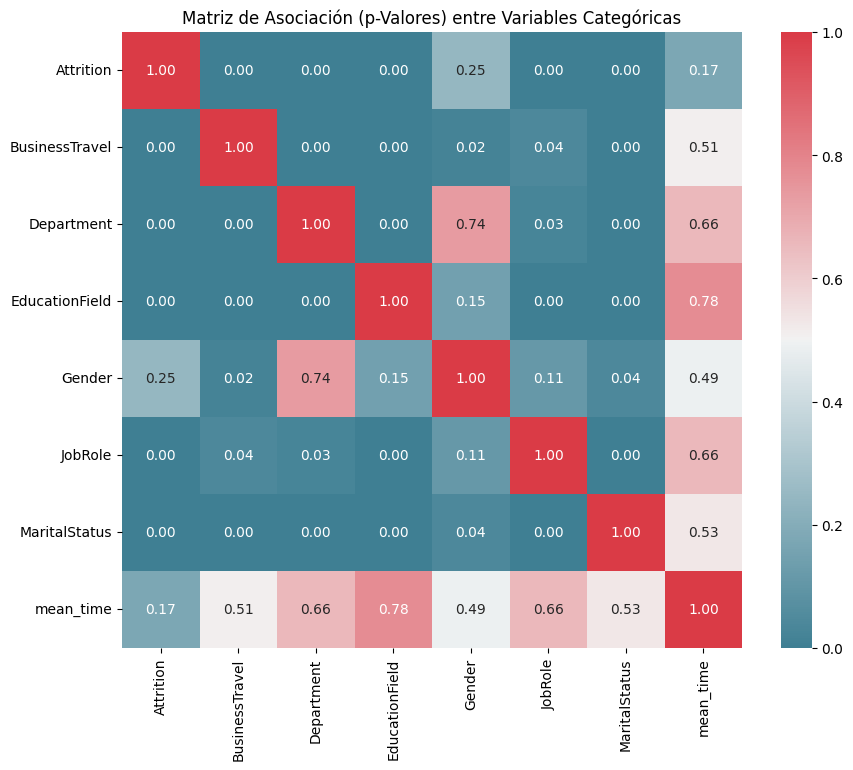

In [52]:
# Seleccionar solo las columnas categóricas
df_categoricas = df_1.select_dtypes(include=['object'])

# Crear una matriz vacía para almacenar los valores de p-valor
p_values = []

# Correlación de chi-cuadrado y los p-valores
for col1 in df_categoricas.columns:
    row_p_values = []
    for col2 in df_categoricas.columns:
        if col1 == col2:
            row_p_values.append(1.0)  # Poner 1.0 en la diagonal principal
        else:
            contingency_table = pd.crosstab(df_categoricas[col1], df_categoricas[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            row_p_values.append(p)
    p_values.append(row_p_values)

# Crear un DataFrame de p-valores
p_value_df = pd.DataFrame(p_values, columns=df_categoricas.columns, index=df_categoricas.columns)

# Tamaño
plt.figure(figsize=(10, 8))

# Colores personalizada
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generar el gráfico de calor
sns.heatmap(p_value_df, annot=True, cmap=cmap, fmt=".2f")

plt.title("Matriz de Asociación (p-Valores) entre Variables Categóricas")

plt.show()

Análisis de variables categóricas vs. Attrition

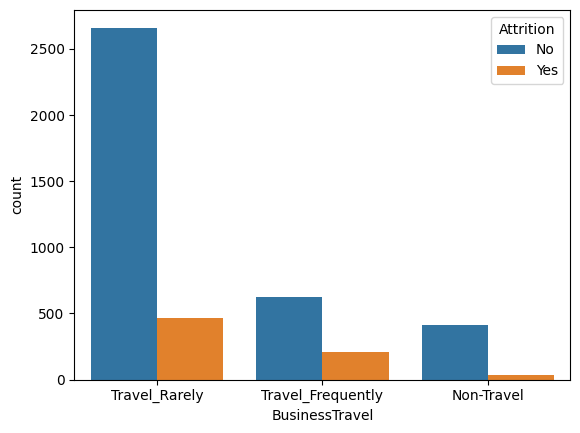

In [50]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df_1)
plt.show()

# d. Preparación de los datos

# e. Selección de variables